# Exploratory data analysis (EDA) - Assignment

## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")

In [42]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
# (Q) how many data-points and features are there in the dataset ?

iris.shape

(150, 5)

In [12]:
#(Q) What are the column names in our dataset?
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

#(Q) Is it a balanced-dataset or imbalanced dataset ?
iris["species"].value_counts()
# Iris is a balanced dataset as the number of data points for every class is 50.

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

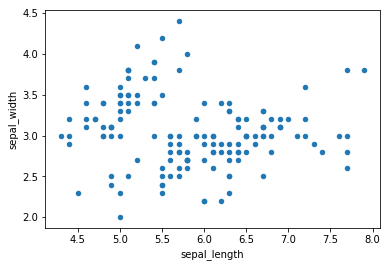

In [15]:
#(Q) Draw a 2-D scatter plot of dataset
#Note: ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()


Observations:
1. cannot make much sense out it. 
2. What if we color the points by thier class-label/flower-type.

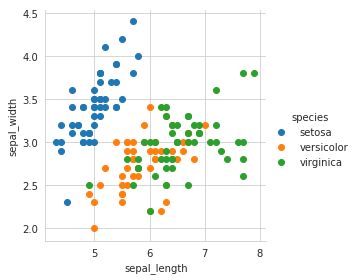

In [19]:
#(Q) Draw a 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 

sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=4) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend();
plt.show();


**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

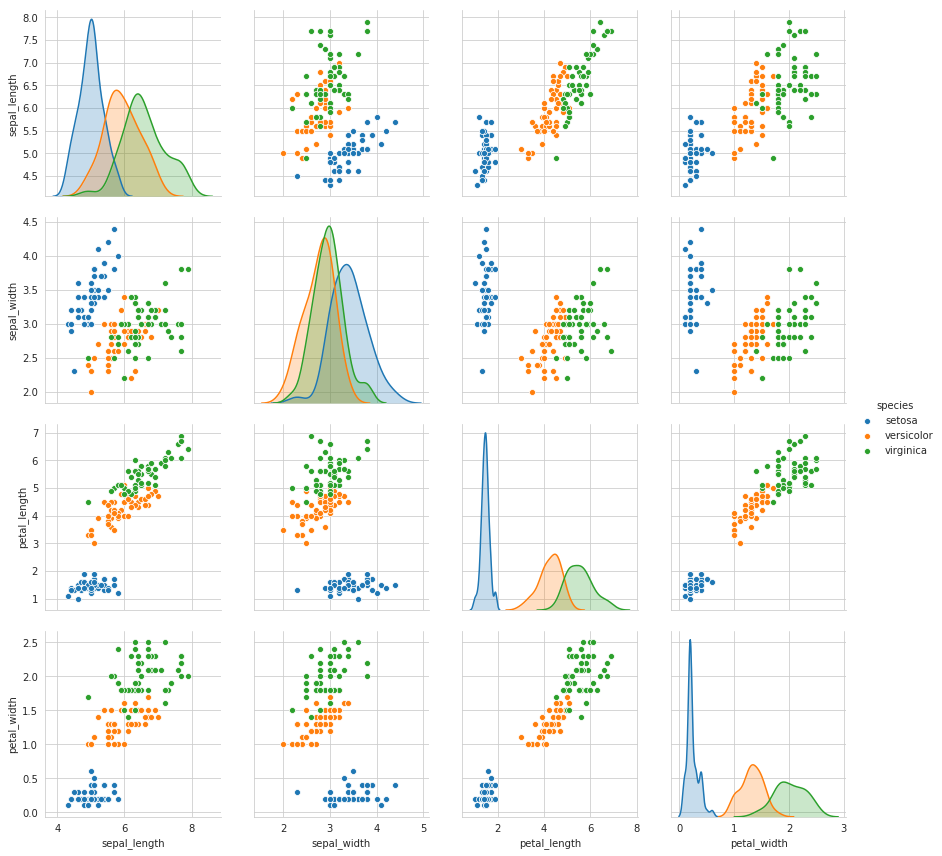

In [18]:
#(Q) Draw a pairwise scatter plot: Pair-Plot

sns.set_style("whitegrid");
sns.pairplot(iris, hue = "species", height = 3);
plt.show()


#### Dis-advantages: 
1. Can be used when number of features are high.
2. Cannot visualize higher dimensional patterns in 3-D and 4-D. 
3. Only possible to view 2D patterns.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

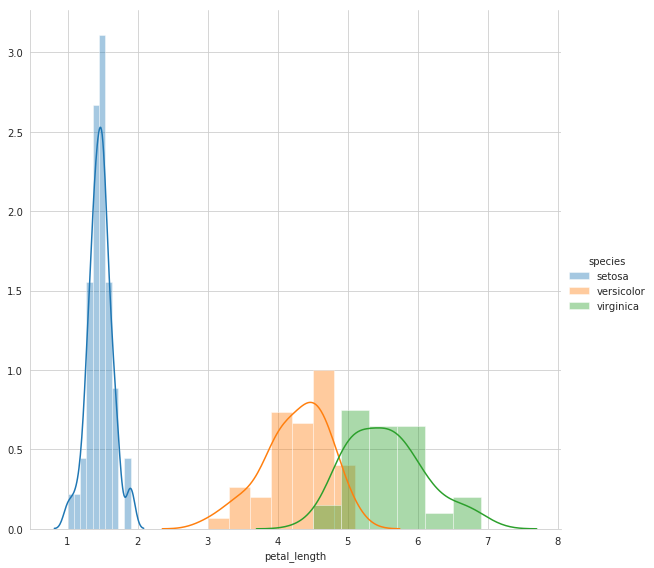

In [28]:
# (Q) Draw a seaborn plot to visualize the petal length for different species using facet grid and map functions

sns.FacetGrid(iris, hue="species", height=8) \
   .map(sns.distplot, "petal_length") \
   .add_legend()

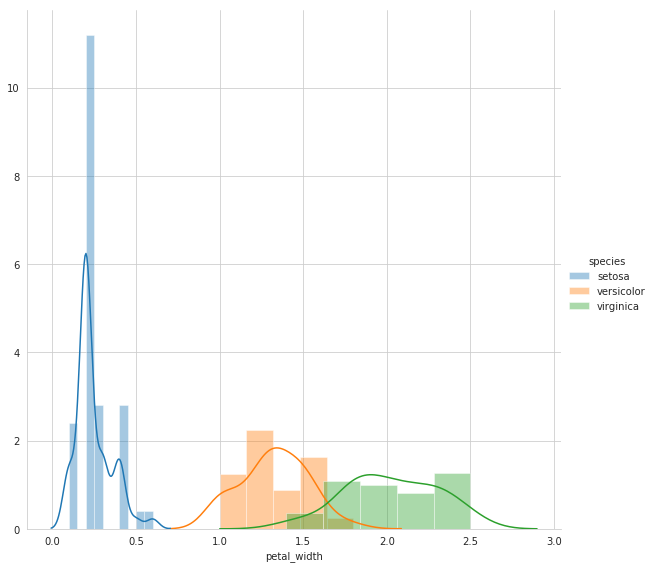

In [29]:
# (Q) Draw a seaborn plot to visualize the petal width for different species using facet grid and map functions

sns.FacetGrid(iris, hue="species", height=8) \
   .map(sns.distplot, "petal_width") \
   .add_legend()

# (3.5) Mean  and Std-dev

In [51]:
#Mean, Variance, Std-deviation,  

iris_setosa = iris.loc[iris.species == 'setosa']
iris_virginica = iris.loc[iris.species == 'virginica']
iris_versicolor = iris.loc[iris.species == 'versicolor']

print("Mean:")
print("iris setosa petal_length Mean: ", np.mean(iris_setosa["petal_length"]))
print("iris virginica petal_length Mean: ", np.mean(iris_virginica["petal_length"]))
print("iris versicolor petal_length Mean: ", np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:")
print("iris setosa petal_length std deviantion: ", np.std(iris_setosa["petal_length"]))
print("iris virginica petal_length std deviantion: ", np.std(iris_virginica["petal_length"]))
print("iris versicolor petal_length std deviantion: ", np.std(iris_versicolor["petal_length"]))

Mean:
iris setosa petal_length Mean:  1.464
iris virginica petal_length Mean:  5.552
iris versicolor petal_length Mean:  4.26

Std-dev:
iris setosa petal_length std deviantion:  0.17176728442867115
iris virginica petal_length std deviantion:  0.5463478745268441
iris versicolor petal_length std deviantion:  0.4651881339845204


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [52]:
#Median, Quantiles, Percentiles, IQR.

print("\nMedians:")
print("iris setosa petal_length median: ", np.median(iris_setosa["petal_length"]))
print("iris virginica petal_length median: ", np.median(iris_virginica["petal_length"]))
print("iris versicolor petal_length median: ", np.median(iris_versicolor["petal_length"]))

print("\nQuantiles:")
print("iris setosa petal_length Quantiles: ", np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print("iris virginica petal_length Quantiles: ", np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print("iris versicolor petal_length Quantiles: ", np.percentile(iris_versicolor["petal_length"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("iris setosa petal_length 90th Percentile: ", np.percentile(iris_setosa["petal_length"],90))
print("iris virginica petal_length 90th Percentile: ", np.percentile(iris_virginica["petal_length"],90))
print("iris versicolor petal_length 90th Percentile: ", np.percentile(iris_versicolor["petal_length"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Median Absolute Deviation for Iris Setosa petal length :", robust.mad(iris_setosa["petal_length"]))
print("Median Absolute Deviation for Iris virginica petal length :", robust.mad(iris_virginica["petal_length"]))
print("Median Absolute Deviation for Iris versicolor petal length :", robust.mad(iris_versicolor["petal_length"]))


Medians:
iris setosa petal_length median:  1.5
iris virginica petal_length median:  5.55
iris versicolor petal_length median:  4.35

Quantiles:
iris setosa petal_length Quantiles:  [1.    1.4   1.5   1.575]
iris virginica petal_length Quantiles:  [4.5   5.1   5.55  5.875]
iris versicolor petal_length Quantiles:  [3.   4.   4.35 4.6 ]

90th Percentiles:
iris setosa petal_length 90th Percentile:  1.7
iris virginica petal_length 90th Percentile:  6.3100000000000005
iris versicolor petal_length 90th Percentile:  4.8

Median Absolute Deviation
Median Absolute Deviation for Iris Setosa petal length : 0.14826022185056031
Median Absolute Deviation for Iris virginica petal length : 0.6671709983275211
Median Absolute Deviation for Iris versicolor petal length : 0.5189107764769602


# (3.7) Box plot and Whiskers

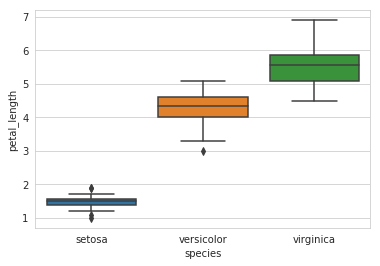

In [30]:
#(Q) Generate a box plot for Iris species with x-axis as species and y-axis as petal_length

sns.boxplot(x='species', y='petal_length',data=iris)
plt.show()

# (3.8) Violin plots

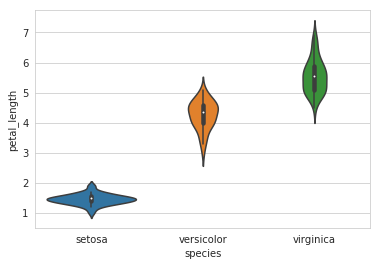

In [31]:
#(Q) Generate a violin plot for Iris species with x-axis as species and y-axis as petal_length

sns.violinplot(x='species', y='petal_length',data=iris)
plt.show()

# (3.11) Multivariate probability density, contour plot.


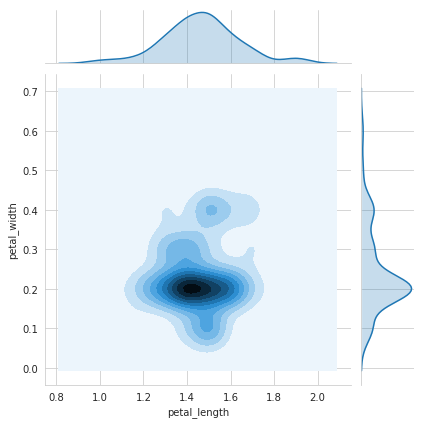

In [53]:
#(Q) Generate a 2D Densse plot for Iris species with x-axis as petal_length and y-axis as petal_width for iris_setosa

sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.